In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Spotify Playlist Data

In [3]:
df = pd.read_csv('charts.csv')

# Data from: https://www.kaggle.com/datasets/dhruvildave/spotify-charts

In [4]:
df.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams'],
      dtype='object')

In [5]:
df['region'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

In [6]:
df.loc[df['region'] == 'Indonesia'].count()

title      449332
rank       449332
date       449332
artist     449332
url        449332
region     449332
chart      449332
trend      449332
streams    358390
dtype: int64

In [7]:
df['artist'].unique()

array(['Shakira', 'Ricky Martin', 'CNCO', ..., 'Adé',
       'Tribl, Maverick City Music', 'Yehuda Elias'], dtype=object)

In [8]:
df_justin = df.loc[df['artist'] == 'Justin Bieber']

df_justin

,title,rank,date,artist,url,region,chart,trend,streams
116,Love Yourself,116,2017-01-01,Justin Bieber,https://open.spotify.com/track/3hB5DgAiMAQ4DzY...,Argentina,top200,MOVE_DOWN,21354.0
127,Sorry,127,2017-01-01,Justin Bieber,https://open.spotify.com/track/69bp2EbF7Q2rqc5...,Argentina,top200,MOVE_DOWN,19775.0
192,What Do You Mean?,192,2017-01-01,Justin Bieber,https://open.spotify.com/track/3pzjHKrQSvXGHQ9...,Argentina,top200,MOVE_DOWN,14498.0
255,Sorry,55,2017-01-01,Justin Bieber,https://open.spotify.com/track/69bp2EbF7Q2rqc5...,Australia,top200,MOVE_DOWN,28250.0
273,Love Yourself,73,2017-01-01,Justin Bieber,https://open.spotify.com/track/3hB5DgAiMAQ4DzY...,Australia,top200,MOVE_UP,22608.0
...,...,...,...,...,...,...,...,...,...
26127637,Peaches (feat. Daniel Caesar & Giveon),18,2021-07-19,Justin Bieber,https://open.spotify.com/track/4iJyoBOLtHqaGxP...,Andorra,viral50,MOVE_DOWN,NaN
26127700,Peaches (feat. Daniel Caesar & Giveon),42,2021-05-31,Justin Bieber,https://open.spotify.com/track/4iJyoBOLtHqaGxP...,Taiwan,viral50,MOVE_DOWN,NaN
26131596,Peaches (feat. Daniel Caesar & Giveon),19,2021-07-20,Justin Bieber,https://open.spotify.com/track/4iJyoBOLtHqaGxP...,Andorra,viral50,MOVE_DOWN,NaN
26135094,Peaches (feat. Daniel Caesar & Giveon),22,2021-07-21,Justin Bieber,https://open.spotify.com/track/4iJyoBOLtHqaGxP...,Andorra,viral50,MOVE_DOWN,NaN


In [9]:
justin_stream = df_justin.groupby(['region'])['streams'].sum()

justin_stream

region
Andorra                 0.000000e+00
Argentina               4.865852e+07
Australia               2.404455e+08
Austria                 1.766648e+07
Belgium                 3.596708e+07
                            ...     
United Arab Emirates    7.607475e+06
United Kingdom          2.805303e+08
United States           1.075164e+09
Uruguay                 3.088179e+06
Vietnam                 1.804017e+07
Name: streams, Length: 70, dtype: float64

In [10]:
justin_stream = pd.DataFrame(justin_stream)

justin_stream.head()

,streams
region,
Andorra,0.0
Argentina,48658519.0
Australia,240445490.0
Austria,17666479.0
Belgium,35967076.0


## Country Admin

In [13]:
country_map = gpd.read_file('data.gpkg', layer='negara')

country_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ..."


In [14]:
country_map.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [33]:
np.sort(country_map['ADMIN'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Southern and Antarctic Lands', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India

In [15]:
justin_country = justin_stream.index.unique()

justin_country

Index(['Andorra', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam'],
      dtype='object', name='region')

In [16]:
for x in justin_country:
    print(x, country_map.loc[country_map['ADMIN'] == x].count()['ADMIN'])

Andorra 0
Argentina 1
Australia 1
Austria 1
Belgium 1
Bolivia 1
Brazil 1
Bulgaria 1
Canada 1
Chile 1
Colombia 1
Costa Rica 1
Czech Republic 0
Denmark 1
Dominican Republic 1
Ecuador 1
Egypt 1
El Salvador 1
Estonia 1
Finland 1
France 1
Germany 1
Global 0
Greece 1
Guatemala 1
Honduras 1
Hong Kong 0
Hungary 1
Iceland 1
India 1
Indonesia 1
Ireland 1
Israel 1
Italy 1
Japan 1
Latvia 1
Lithuania 1
Luxembourg 1
Malaysia 1
Mexico 1
Morocco 1
Netherlands 1
New Zealand 1
Nicaragua 1
Norway 1
Panama 1
Paraguay 1
Peru 1
Philippines 1
Poland 1
Portugal 1
Romania 1
Russia 1
Saudi Arabia 1
Singapore 0
Slovakia 1
South Africa 1
South Korea 1
Spain 1
Sweden 1
Switzerland 1
Taiwan 1
Thailand 1
Turkey 1
Ukraine 1
United Arab Emirates 1
United Kingdom 1
United States 0
Uruguay 1
Vietnam 1


In [19]:
for i, x in enumerate(justin_country):
    print(i, x)

0 Andorra
1 Argentina
2 Australia
3 Austria
4 Belgium
5 Bolivia
6 Brazil
7 Bulgaria
8 Canada
9 Chile
10 Colombia
11 Costa Rica
12 Czech Republic
13 Denmark
14 Dominican Republic
15 Ecuador
16 Egypt
17 El Salvador
18 Estonia
19 Finland
20 France
21 Germany
22 Global
23 Greece
24 Guatemala
25 Honduras
26 Hong Kong
27 Hungary
28 Iceland
29 India
30 Indonesia
31 Ireland
32 Israel
33 Italy
34 Japan
35 Latvia
36 Lithuania
37 Luxembourg
38 Malaysia
39 Mexico
40 Morocco
41 Netherlands
42 New Zealand
43 Nicaragua
44 Norway
45 Panama
46 Paraguay
47 Peru
48 Philippines
49 Poland
50 Portugal
51 Romania
52 Russia
53 Saudi Arabia
54 Singapore
55 Slovakia
56 South Africa
57 South Korea
58 Spain
59 Sweden
60 Switzerland
61 Taiwan
62 Thailand
63 Turkey
64 Ukraine
65 United Arab Emirates
66 United Kingdom
67 United States
68 Uruguay
69 Vietnam


In [21]:
country_geom = country_map[['ADMIN', 'geometry']]

country_geom

,ADMIN,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Republic of Serbia,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45..."
173,Montenegro,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
174,Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."
175,Trinidad and Tobago,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ..."


In [22]:
country_geom.loc[country_geom['ADMIN'] == 'Czechia'] = country_geom.loc[country_geom['ADMIN'] == 'Czechia'].replace('Czechia', 'Czech Republic')

In [23]:
country_geom.loc[country_geom['ADMIN'] == 'Hong Kong S.A.R.'] = country_geom.loc[country_geom['ADMIN'] == 'Hong Kong S.A.R.'].replace('Hong Kong S.A.R.', 'Hong Kong')

In [24]:
country_geom.loc[country_geom['ADMIN'] == 'United States of America'] = country_geom.loc[country_geom['ADMIN'] == 'United States of America'].replace('United States of America', 'United States')

In [25]:
for x in justin_country:
    print(x, country_geom.loc[country_geom['ADMIN'] == x].count()['ADMIN'])

Andorra 0
Argentina 1
Australia 1
Austria 1
Belgium 1
Bolivia 1
Brazil 1
Bulgaria 1
Canada 1
Chile 1
Colombia 1
Costa Rica 1
Czech Republic 1
Denmark 1
Dominican Republic 1
Ecuador 1
Egypt 1
El Salvador 1
Estonia 1
Finland 1
France 1
Germany 1
Global 0
Greece 1
Guatemala 1
Honduras 1
Hong Kong 0
Hungary 1
Iceland 1
India 1
Indonesia 1
Ireland 1
Israel 1
Italy 1
Japan 1
Latvia 1
Lithuania 1
Luxembourg 1
Malaysia 1
Mexico 1
Morocco 1
Netherlands 1
New Zealand 1
Nicaragua 1
Norway 1
Panama 1
Paraguay 1
Peru 1
Philippines 1
Poland 1
Portugal 1
Romania 1
Russia 1
Saudi Arabia 1
Singapore 0
Slovakia 1
South Africa 1
South Korea 1
Spain 1
Sweden 1
Switzerland 1
Taiwan 1
Thailand 1
Turkey 1
Ukraine 1
United Arab Emirates 1
United Kingdom 1
United States 1
Uruguay 1
Vietnam 1


In [27]:
country_geom = country_geom.set_index('ADMIN')

country_geom

,geometry
ADMIN,
Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
United Republic of Tanzania,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...
Republic of Serbia,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45..."
Montenegro,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."


In [28]:
justin_final_map = country_geom.join(justin_stream, how='left')

justin_final_map

,geometry,streams
ADMIN,,
Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
United Republic of Tanzania,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1...",NaN
Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27...",NaN
Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2.381351e+08
United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.075164e+09
...,...,...
Republic of Serbia,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45...",NaN
Montenegro,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42...",NaN
Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42...",NaN


## Map making

In [31]:
map = justin_final_map.to_crs(3857)

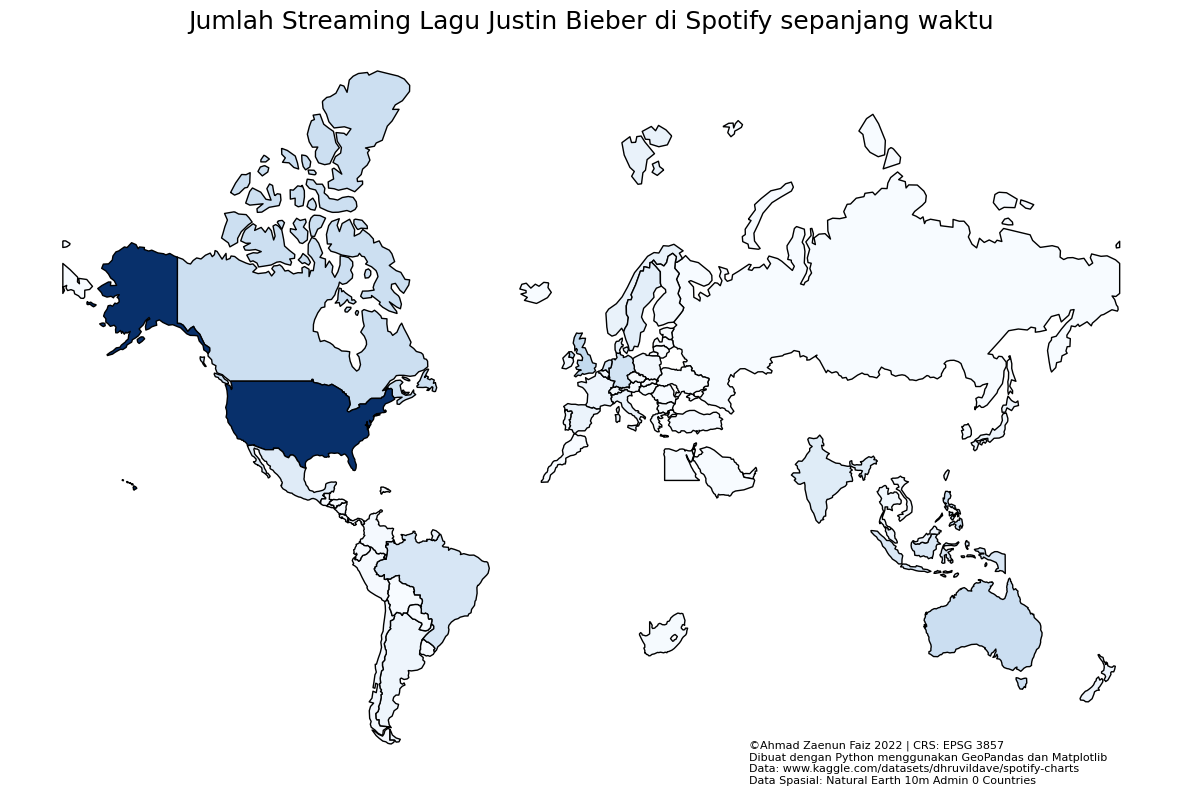

In [141]:
fig, ax = plt.subplots(figsize=(15, 15))

map.plot(ax=ax,
         cmap='Blues',
         column='streams',
         edgecolor="black",
        )

plt.title('Jumlah Streaming Lagu Justin Bieber di Spotify sepanjang waktu', fontsize=18)

plt.axis('off')

plt.text(6000000, -9000000, 
         '©Ahmad Zaenun Faiz 2022 | CRS: EPSG 3857\nDibuat dengan Python menggunakan GeoPandas dan Matplotlib\nData: www.kaggle.com/datasets/dhruvildave/spotify-charts\nData Spasial: Natural Earth 10m Admin 0 Countries', 
         fontsize=8)

plt.show()

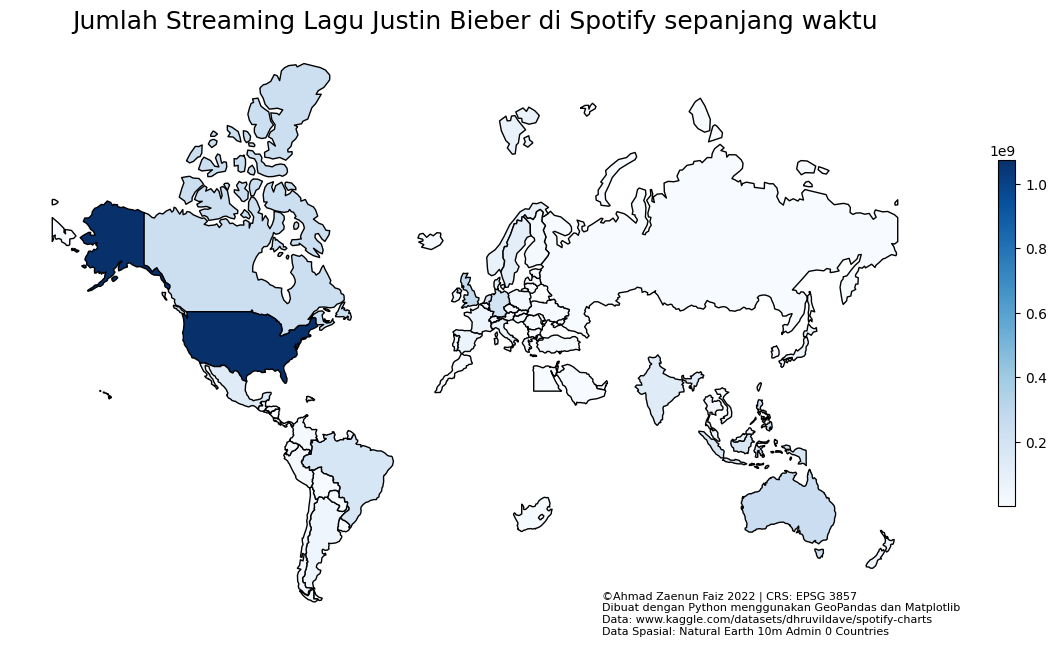

In [140]:
fig, ax = plt.subplots(figsize=(15, 15))

map.plot(ax=ax,
         cmap='Blues',
         column='streams',
         edgecolor="black",
         legend=True,
         legend_kwds={'shrink': 0.3}
        )

plt.title('Jumlah Streaming Lagu Justin Bieber di Spotify sepanjang waktu', fontsize=18)

plt.axis('off')

plt.text(6000000, -9000000, 
         '©Ahmad Zaenun Faiz 2022 | CRS: EPSG 3857\nDibuat dengan Python menggunakan GeoPandas dan Matplotlib\nData: www.kaggle.com/datasets/dhruvildave/spotify-charts\nData Spasial: Natural Earth 10m Admin 0 Countries', 
         fontsize=8)

plt.show()